In [28]:
import numpy as np
import matplotlib.pyplot as pyplot
x = [1, 3, 4.5, 5.5]
y = [2.5, 3, 3, 3.5]

In [30]:
m = len(y)

X = np.zeros((m, 2))

X[: ,0] = 1
X[: ,1] = x

In [31]:
def h(theta, x):
    return theta[0] + theta[1] * x

In [32]:
def gradient_step(theta, x, y, alpha, verbose=False):
    if verbose: print("Gradient step ", theta, x, y, alpha)
    delta = np.zeros(np.shape(theta))
    m = len(y)
    for i in range(m):
        delta[0] -= (2/float(m)) * (y[i] - h(theta, x[i]))
        delta[1] -= (2/float(m)) * (y[i] - h(theta, x[i])) * x[i]
        if verbose: print(i, delta)
    if verbose:
        print("Theta", theta - alpha * delta)
        print("Cost", sum(1/(2*m) * np.square(h(theta, np.array(x)) - np.array(y))))
    return theta - alpha * delta

def gradient_descent(x, y, initial_theta, alpha, iterations, verbose=False):
    theta = initial_theta
    for i in range(iterations):
        if verbose: print("** Iteration ", i)
        theta = gradient_step(theta, x, y, alpha, verbose)
    return theta

In [33]:
gradient_descent(x, y, np.array([0, 0]), 0.005, 2000)

array([2.25698739, 0.20928946])

In [37]:
def gradient_descent_2(hyp, cost, cost_prime, x, y, theta, alpha, iterations, verbose=False):
    cost_history = []
    delta = np.zeros(np.shape(theta))
    for i in range(iterations):
        if verbose: print("** Iteration ", i)
        delta = cost_prime(hyp, theta, x, y)
        theta = theta - alpha * delta
        cost_history.append(cost(theta, x, y))
    return theta, cost_history

In [40]:
def cost_2(theta, x, y):
    m = np.size(y)
    return sum(1/(2*m) * np.square(h2(theta, np.array(x)) - np.array(y)))

def h2(theta, x):
    X = np.ones([len(x),len(theta)])
    X[:,1] = x
    return X.dot(theta.T)

def linear_cost_prime(hyp, theta, x, y):
    delta = np.zeros(np.shape(theta))
    delta[0] -= (2/float(m)) * sum((y - hyp(theta, x)))
    delta[1] -= (2/float(m)) * sum((y - hyp(theta, x)) * x)
    return delta

In [41]:
def gradient_descent_2(hyp, cost, cost_prime, x, y, theta, alpha, iterations, verbose=False):
    cost_history = []
    delta = np.zeros(np.shape(theta))
    for i in range(iterations):
        if verbose: print("** Iteration ", i)
        delta = cost_prime(hyp, theta, x, y)
        theta = theta - alpha * delta
        cost_history.append(cost(theta, x, y))
    return theta, cost_history

In [46]:
theta, cost_history = gradient_descent_2(h2, cost_2, linear_cost_prime, x, y, np.array([0, 0]), 0.05, 5000)


Text(0, 0.5, 'Cost')

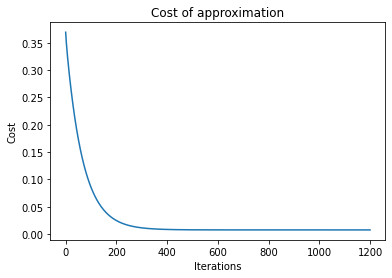

In [54]:
x_axis = np.linspace(0, 1200, 500)
pyplot.plot(x_axis, cost_history[5:505])
pyplot.title("Cost of approximation")
pyplot.xlabel("Iterations")
pyplot.ylabel("Cost")